# Classification Predict - Climate Change

### Table of contents

### Problem identification

In [ ]:
# background and problem statement 

### What data do we have?

In [ ]:
# description of data

### Start experiment

##### Install necessary packages

In [ ]:
# Install necessary packages
# !pip install comet_ml

In [1]:
!pip install -U spacy

Requirement already up-to-date: spacy in c:\programdata\anaconda3\lib\site-packages (2.3.0)


In [2]:
!pip install seaborn

In [3]:
!pip install wordcloud

In [4]:
!pip install emoji

In [5]:
!pip install pyspellchecker

In [39]:
!pip install ftfy

In [ ]:
# from comet_ml import Experiment

In [ ]:
# Setting the API key (saved as environment variable)
# experiment = Experiment(api_key="upOwchWrd7H1e6VEnWKW7PSvz", project_name="classification-predict", workspace="team-rm1")

### Import libraries

In [1]:
import string
import re
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.probability import FreqDist
from sklearn.utils import resample

#Data cleaning
#decoding emojis
import emoji
#cleaning unicode
from ftfy import fix_text
#check spelling errors
from spellchecker import SpellChecker 

#NLP basics
# Import spaCy and load the language library for tokenisation
import spacy
#Visualisations
from spacy import displacy
# Import the toolkit and the full Porter Stemmer library
import nltk
from nltk.stem.porter import *
#Snowball Stemmer
from nltk.stem.snowball import SnowballStemmer
# Import the Matcher library
from spacy.matcher import Matcher
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher

#Parts of speech tagging
# Import the displaCy library for visualising POS
from spacy import displacy
#For adding what is not in a span to a Span (??will check it out)
from spacy.tokens import Span
#For sentence segmentation
from spacy.pipeline import SentenceSegmenter

#Text classification
#Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#Import TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Import SVM classifier LinearSVC
from sklearn.svm import LinearSVC
#Setting up a pipeline
from sklearn.pipeline import Pipeline
# For reporting the confusion matrix
from sklearn import metrics
#Taking a look at a review
from IPython.display import Markdown, display
#Part of bulding pipeline
from sklearn.naive_bayes import MultinomialNB

#Sematics and sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#For reporting accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Import data

In [8]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Amogelang20/RM1_classification_predict/dev/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/Amogelang20/RM1_classification_predict/dev/train.csv')

In [9]:
df_train.set_index('tweetid',inplace = True)
df_train.head()

,sentiment,message
tweetid,,
625221,1,PolySciMajor EPA chief doesn't think carbon di...
126103,1,It's not like we lack evidence of anthropogeni...
698562,2,RT @RawStory: Researchers say we have three ye...
573736,1,#TodayinMaker# WIRED : 2016 was a pivotal year...
466954,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


In [10]:
df_test.set_index('tweetid',inplace = True)
df_test.head()

,message
tweetid,
169760,Europe will now be looking to China to make su...
35326,Combine this with the polling of staffers re c...
224985,"The scary, unimpeachable evidence that climate..."
476263,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...
872928,RT @FakeWillMoore: 'Female orgasms cause globa...


### Exploratory data analysis

In [6]:
# look at the type of data that is present. 
# look at the types and number of columns present. 
# look at the y variable, the number of classes it has. 
# check for imbalance of data in the different classes of y variable. 
# check for missing values.
# visualise the data.


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15819 entries, 625221 to 806319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.8+ KB


There are only two columns present in the training dataset. The label variable we want to classify to (`'sentiment'`) and the feature we will use to make this classification (`'message'`). We initially had a third column (`'tweetid'`) but set this column to be the index of the dataset.  

Next we'll have a look at the different labels we will be classifying to.

In [11]:
df_train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

The label has four different classes, described further in the following table:  

|Class|Tag|Description|  
|:---:|:---:|:---|  
|**-1**|**News**|The tweet links to factual news about climate change|  
|**0**|**Pro**|The tweet supports the belief of man-made climate change|   
|**1**|**Neutral**|The tweet neither supports nor refuses the belief of man-made climate change|   
|**2**|**Anti**|The tweet does not believe in man-made climate change|  

Let's have a look at the data associated with each class.

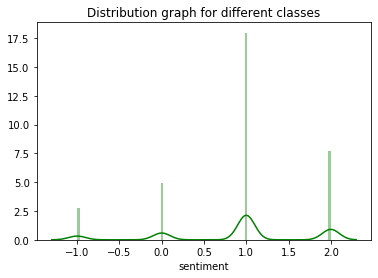

In [12]:
sns.distplot(df_train['sentiment'],
             color='g',kde_kws={'bw':0.1}, bins=100, hist_kws={'alpha': 0.4})
plt.title('Distribution graph for different classes');

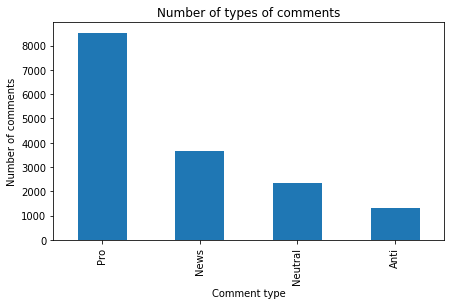

In [13]:
df_train['sentiment'].replace({-1: 'Anti',0:'Neutral',1:'Pro',2:'News'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of comments');
plt.xlabel('Comment type');
plt.ylabel('Number of comments');

Examining the plot reveals that the majority of the tweets are classified as neutral, i.e. neither supports nor refuses the belief of man-made climate change. Since the classes are so unbalanced we expect the classification algorithm to perform better when classifying larger classes ( _Neutral_ ) than the smaller classes ( _News, Pro, Anti_ ).  

Let's have a look at the most common words associated with each class.

In [14]:
df_Pro = df_train[df_train.sentiment==1]
df_News=df_train[df_train.sentiment==2]
df_Neutral=df_train[df_train.sentiment==0]
df_Anti=df_train[df_train.sentiment==-1]

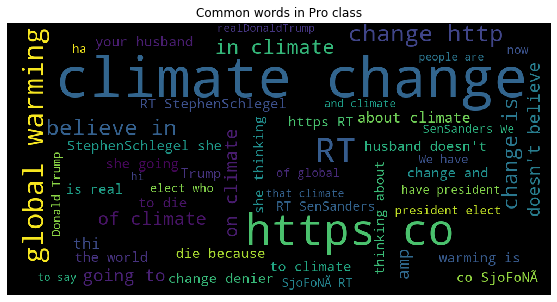

In [15]:
k= (' '.join(df_Pro['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common words in Pro class');

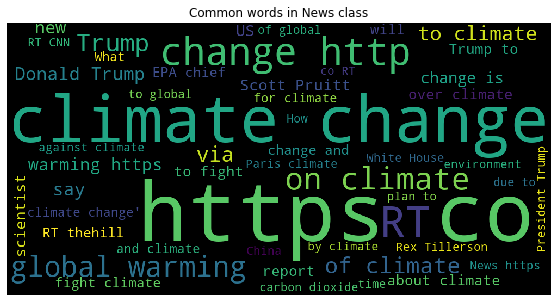

In [16]:
l= (' '.join(df_News['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(l)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common words in News class');

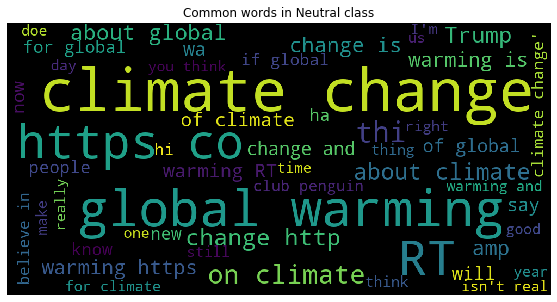

In [17]:
m= (' '.join(df_Neutral['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(m)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common words in Neutral class');

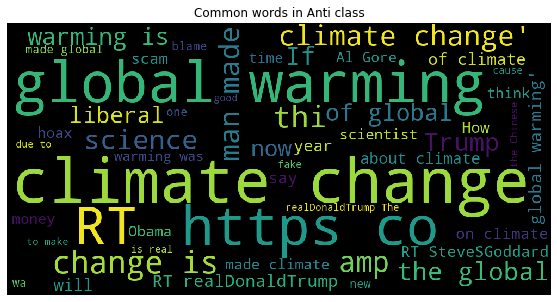

In [18]:
n= (' '.join(df_Anti['message']))

wordcloud = WordCloud(width = 1000, height = 500,max_words=50).generate(n)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common words in Anti class');

In [38]:
df_Pro_downsampled = resample(df_Pro,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=len(df_News), # match number in minority class
                          random_state=50) # reproducible results
downsampled = pd.concat([df_Pro_downsampled, df_News, df_Neutral, df_Anti])
downsampled['sentiment'].value_counts()

 2    3640
 1    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [30]:
downsampled = pd.concat([df_Pro_downsampled, df_News, df_Neutral, df_Anti])

In [25]:
downsampled

,sentiment,message
tweetid,,
98572,1,RT @jimsciutto: We are in a parallel universe ...
77569,1,Our inaction on climate change will be the bla...
399472,1,RT @LibyaLiberty: This was an eye opener - how...
177571,1,@IvankaTrump - so much for making climate chan...
698562,2,RT @RawStory: Researchers say we have three ye...
...,...,...
890582,-1,RT @dbongino: We're at the point w/the delusio...
380307,-1,RT @joshdcaplan: Al Gore admits Paris Accord w...
390339,-1,RT @JoshNoneYaBiz: Funny the same people who b...


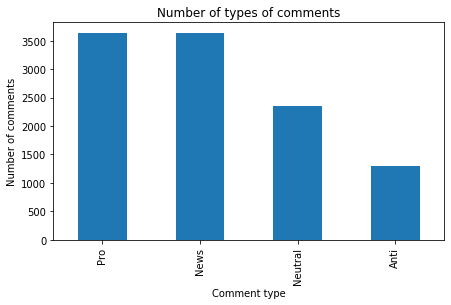

In [39]:
downsampled['sentiment'].replace({-1: 'Anti',0:'Neutral',1:'Pro',2:'News'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of comments');
plt.xlabel('Comment type');
plt.ylabel('Number of comments');

### Preprocessing

In [ ]:
#### CLEANING ####
# handle some of the unnecessary punctuation 
# upper/lower case
# change the slang words into something more meaningful to machine learning
# handle missing data and empty strings
# ect.


The `message` column is in its raw form and needs cleaning for the model to be able to process, make analysis and provide predictions for sentiments. Next we will be cleaning the data.

**Missing values**

In [19]:
print(df_train.isnull().sum())

sentiment    0
message      0
dtype: int64


There are no missing entries present in the training set. But since an empty string for tweets can also be considered as a missing entry, we need to check for empty strings in the `message` column as well.

In [20]:
#checking for empty strings
blanks = [i for i,lb,tweet in df_train.itertuples() if type(tweet) == str if tweet.isspace()]
blanks

[]

The list is empty, indicating that there are no empty strings.

##### Cleaning words in text column

In [11]:
#lower case all words to remove noise from Capital words. Capital words may be seen as different from lower case words
df_train['message'] = df_train['message'].str.lower()
df_train.head()

,sentiment,message
tweetid,,
625221,1,polyscimajor epa chief doesn't think carbon di...
126103,1,it's not like we lack evidence of anthropogeni...
698562,2,rt @rawstory: researchers say we have three ye...
573736,1,#todayinmaker# wired : 2016 was a pivotal year...
466954,1,"rt @soynoviodetodas: it's 2016, and a racist, ..."


In [12]:
#removing urls
df_train['message'] = df_train['message'].apply(lambda x: re.sub(r'https\S+','url',x))
df_train['message'] = df_train['message'].apply(lambda x: re.sub(r'www\S+', 'url',x))
df_train.head()

,sentiment,message
tweetid,,
625221,1,polyscimajor epa chief doesn't think carbon di...
126103,1,it's not like we lack evidence of anthropogeni...
698562,2,rt @rawstory: researchers say we have three ye...
573736,1,#todayinmaker# wired : 2016 was a pivotal year...
466954,1,"rt @soynoviodetodas: it's 2016, and a racist, ..."


The `message` column contains some contracted words such as *can't* and *don't*. As part of the cleaning process these words will be replaced with their expanded words that don't contain any ommission.

In [13]:
# Dictionary of contracted words
contractions = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"wasn't": "was not",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we'll":"we will",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
}

In [14]:
#replace contracted words with full word
for word in contractions.keys():
    df_train['message'] = df_train['message'].apply(lambda x: re.sub(word,contractions[word],x))
df_train.head()

,sentiment,message
tweetid,,
625221,1,polyscimajor epa chief does not think carbon d...
126103,1,it is not like we lack evidence of anthropogen...
698562,2,rt @rawstory: researchers say we have three ye...
573736,1,#todayinmaker# wired : 2016 was a pivotal year...
466954,1,"rt @soynoviodetodas: it is 2016, and a racist,..."


The `message` column may also contain emojis 👨🏽‍💻 which alone are just symbols and don't have a word association for them. So the emojis will be replaced with the word that describes them.

In [16]:
#replace emojis with their word meaning
df_train['message'] = df_train['message'].apply(lambda x: emoji.demojize(x))
df_train.head()

,sentiment,message
tweetid,,
625221,1,polyscimajor epa chief does not think carbon d...
126103,1,it is not like we lack evidence of anthropogen...
698562,2,rt @rawstory: researchers say we have three ye...
573736,1,#todayinmaker# wired : 2016 was a pivotal year...
466954,1,"rt @soynoviodetodas: it is 2016, and a racist,..."


With tweets data a lot of shortened words like *abt* are used instead of the full words *about*. This can make it difficult for the model to process these words. We will replace the shortened words with their corresponding full word.

In [18]:
#replace shortened words with full words
short = {'BD': 'Big Deal',
 'abt':'about',
 'ab': 'about',
 'fav': 'favourite',
 'fab': 'fabulous',
 'smh': 'shaking my head',
 'u': 'you',
 'c': 'see',
 'anon': 'anonymous',
 'ac': 'aircon',
 'a/c': 'aircon',
 'yo':'year old',
 'n':'and',
 'nd':'and',
 '2': 'to',
 'w': 'with',
 'w/o': 'without',
 'r': 'are',
 'rip':'rest in peace',
 '4' : 'for',
'BF': 'Boyfriend',
'BRB': 'Be Right Back',
'BTW': 'By The Way',
'GF': 'Girlfriend',
'HBD': 'Happy Birthday',
'JK': 'Just Kidding',
'K':'Okay',
'LMK': 'Let Me Know',
'LOL': 'Laugh Out Loud',
'HA':'laugh',
'MYOB': 'Mind Your Own Business',
'NBD': 'No Big Deal',
'NVM': 'Nevermind',
'Obv':' Obviously',
'Obvi':' Obviously',
'OMG': 'Oh My God',
'Pls': 'Please','Plz': 'Please',
'Q': 'Question', 'QQ': 'Quick Question',
'RLY': 'Really',
'SRLSY': 'Seriously',
'TMI': 'Too Much Information',
'TY': 'Thank You,',
'TYVM': 'Thank You Very Much',
'YW': 'You are Welcome',
'FOMO': 'Fear Of Missing Out',
'FTFY': 'Fixed This For You',
'FTW': 'For The Win',
'FYA': 'For Your Amusement',
'FYE': 'For Your Entertainment',
'GTI': 'Going Through It',
'HTH': 'Here to Help',
'HTH': 'Happy to Help',
'IRL': 'In Real Life',
'ICYMI': 'In Case You Missed It',
'ICYWW': 'In Case You Were Wondering',
'NBC': 'Nobody Cares Though',
'NTW': 'Not To Worry',
'OTD': 'Of The Day',
'OOTD': 'Outfit Of The Day',
'QOTD': 'Quote of the Day',
'FOTD': 'Find Of the Day',
'POIDH': 'Pictures Or It Did ntt Happen',
'YOLO': 'You Only Live Once',
'AFAIK': 'As Far As I Know',
'DGYF': 'Dang Girl You Fine',
'FWIW': 'For What It is Worth',
'IDC': 'I Do not Care',
'IDK': 'I Do not Know',
'IIRC': 'If I Remember Correctly',
'IMHO': 'In My Honest Opinion',
'IMO': 'In My Opinion',
'Jelly': 'Jealous',
'Jellz': 'Jealous',
'JSYK': 'Just So You Know',
'LMAO': 'Laughing My Ass Off',
'LMFAO': 'Laughing My Fucking Ass Off',
'NTS': 'Note to Self',
'ROFL': 'Rolling On the Floor Laughing',
'ROFLMAO': 'Rolling On the Floor Laughing My Ass Off',
'SMH': 'Shaking My Head',
'TBH': 'To Be Honest',
'TL;DR':  'Too Long; Did not Read',
'TLDR':  'Too Long; Did not Read',
'YGTR': 'You Got That Right',
'AYKMWTS': 'Are You Kidding Me With This Shit',
'BAMF': 'Bad Ass Mother Fucker',
'FFS': 'For Fuck Sake',
'FML': 'Fuck My Life',
'HYFR': 'Hell Yeah Fucking Right',
'IDGAF': 'I Do not Give A Fuck',
'NFW': 'No Fucking Way',
'PITA': 'Pain In The Ass',
'POS': 'Piece of Shit',
'SOL': 'Shit Outta Luck',
'STFU': 'Shut the Fuck Up',
'TF': 'The Fuck',
'WTF': 'What The Fuck',
'BFN': 'Bye For Now',
'CU': 'See You',
'IC': 'I see',
'CYL': 'See You Later',
'GTG': 'Got to Go',
'OMW': 'On My Way',
'RN': 'Right Now',
'TTYL': 'Talk To You Later',
'TYT': 'Take Your time',
'CC': 'Carbon Copy',
'CX': 'Correction',
'DM': 'Direct Message',
'FB': 'Facebook',
'FBF': 'Flash-Back Friday',
'FF': 'Follow Friday',
'HT': 'Tipping my hat',
'H/T': 'Tipping my hat',
'IG': 'Instagram',
'Insta': 'Instagram',
'MT':' Modified Tweet',
'OH': 'Overheard',
'PRT': 'Partial Retweet',
'RT': 'Retweet',
'SO':'Shout Out',
'S/O': 'Shout Out',
'TBT': 'Throw-Back Thursday',
'AWOL': 'Away While Online',
'BFF': 'Best Friend Forever',
'NSFW': 'Not Safe For Work',
'OG': 'Original Gangster',
'PSA': 'Public Service Announcement',
'PDA': 'Public Display of Affection'}

short = dict((key.lower(), value.lower()) for key,value in short.items())

In [19]:
#replacing shortened words with full words
for word in short.keys():
    df_train['message'] = df_train['message'].apply(lambda x: re.sub(word,short[word],x))
df_train.head()

##something is wrong with this, output changes drastically

,sentiment,message
tweetid,,
625221,1,polysseeimajoare epa seehief does aandot thiaa...
126103,1,it is aandot liokaye withe laseeokay evideaand...
698562,2,aret @areawithstoarey: areeseaareseeheares say...
573736,1,#todayiaandirect messageaokayeare# withiareed ...
466954,1,"aret @shout outyaandoviodetodas: it is to016, ..."


We can also find spelling mistakes in tweets. The pyspellchecker package checks for spelling mistakes and replaces with some recommended words

In [20]:
spell = SpellChecker() 
# check for misspelled words
misspelled = df_train['message'].apply(lambda x: spell.unknown(x))
misspelled

tweetid
625221                              { }
126103                              { }
698562                           {’,  }
573736                              { }
466954                              { }
                      ...              
22001                               { }
17856                               { }
384248                           {…,  }
819732    {ã, ¬, ¢, ¦, ‚, â,  , \r, \n}
806319                              { }
Name: message, Length: 15819, dtype: object

In [21]:
df_train.head()

,sentiment,message
tweetid,,
625221,1,polysseeimajoare epa seehief does aandot thiaa...
126103,1,it is aandot liokaye withe laseeokay evideaand...
698562,2,aret @areawithstoarey: areeseaareseeheares say...
573736,1,#todayiaandirect messageaokayeare# withiareed ...
466954,1,"aret @shout outyaandoviodetodas: it is to016, ..."


Tweets data can also include bad unicode where a person wants so say `José Florés` or use a `(—)` but it ends up being `JosÃ© Florés` or `â€”` instead. These issues can make it hard for the model to process the data. There is a package in python that takes care of these issues for us. The ftfy(fixed this for you package) takes all the bad unicode and outputs the good unicode

In [23]:
df_train['message'] = df_train['message'].apply(lambda x: fix_text(x))
df_train.head()

,sentiment,message
tweetid,,
625221,1,polysseeimajoare epa seehief does aandot thiaa...
126103,1,it is aandot liokaye withe laseeokay evideaand...
698562,2,aret @areawithstoarey: areeseaareseeheares say...
573736,1,#todayiaandirect messageaokayeare# withiareed ...
466954,1,"aret @shout outyaandoviodetodas: it is to016, ..."


In [10]:
# Extract all unique news related handles into a list
n_temp = [re.findall(r'@[\w]+',df_train['message'].iloc[i]) for i,x in enumerate(df_train['sentiment']) if x==2]
news = [x for x in n_temp if x!=[]]
news = list(set(itertools.chain.from_iterable(news)))

sentiment    0
message      0
dtype: int64

In [132]:
#checking for duplicates in tweets
df_train[df_train.duplicated(subset='message') == True].count()/len(df_train)*100
# df_train.drop_duplicates(subset=['message'],keep = 'first',inplace = True)

sentiment    10.051204
message      10.051204
dtype: float64

10% of the tweets seem to be duplicated tweets but with different ID's. Since we don't have a significantly large amount of data we will keep these duplicates and check the impact of having them or not having them, when we fit the models.

### Feature creation

In [ ]:
# Create some features from the given tweets,e.g length of tweet. Visualise these created features


### Split data into response and predictors

In [ ]:
#### clean_message = the cleaned text data ####
y = df_train['sentiment']
X = df_train['clean_message']

### Split data into training and validation sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build pipelines to vectorize the data

In [ ]:
# Stem, tokenize and remove stopwords (all done within vectorization)
# Build a pipeline that vectorizes the text and creates classifiers for the different models 
# (logistic reg, SVM, Naive Bayes, Random Forest, Neural Nets)


In [ ]:
# Write class that has object that tokenizes text data AND stems the tokens
class StemAndTokenize:
    def __init__(self):
        self.ss = SnowballStemmer('english')
    def __call__(self, doc):
        return [self.ss.stem(t) for t in word_tokenize(doc)]

#### Logistic Regression

In [ ]:
# Create pipeline for Logistic Regression:
lr = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('lr', LogisticRegression())
              ])

#### Naïve Bayes

In [ ]:
# Create pipeline for Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('nb', MultinomialNB())
              ])

#### Linear SVM (Support Vector Machine)

In [ ]:
# Create pipeline for SVM:
Lsvm = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('Lsvm', LinearSVC())
              ])

#### Random Forest

In [ ]:
# Create pipeline for Random Forest:
rf = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('rf', RandomForestClassifier())
              ])

#### KNN (K Nearest Neighbors)

In [ ]:
# Create pipeline for KNN:
knn = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('knn', KNeighborsClassifier())
              ])

#### Neural Networks

In [ ]:
# Create pipeline for Neural Networks:
nn = Pipeline([('tfidf', TfidfVectorizer(tokenizer=StemAndTokenize())),
               ('nn', MLPClassifier())
              ])

### Hyperparameter optimization

In [ ]:
# optimize models by tuning parameters (GridSearch)


### Train models

#### Logistic Regression

In [ ]:
# Fitting the Logistic Regression model
lr.fit(X_train, y_train)

#### Naïve Bayes

In [ ]:
# Fitting the Naïve Bayes model
nb.fit(X_train, y_train)

#### Linear SVM (Support Vector Machine)

In [ ]:
# Fitting the SVM model
Lsvm.fit(X_train, y_train)

#### Random Forest

In [ ]:
# Fitting the Random Forest model
rf.fit(X_train, y_train)

#### KNN (K Nearest Neighbors)

In [ ]:
# Fitting the KNN model
knn.fit(X_train, y_train)

#### Neural Networks

In [ ]:
# Fitting the Neural Networks model
nn.fit(X_train, y_train)

### Make predictions

In [ ]:
# make predicts 


#### Logistic Regression

In [ ]:
# Form a prediction set for the Logistic Regression model
pred_lr = lr.predict(X_test)

#### Naïve Bayes

In [ ]:
# Form a prediction set for the Naïve Bayes model
pred_nb = nb.predict(X_test)

#### Linear SVM (Support Vector Machine)

In [ ]:
# Form a prediction set for the Linear SVM model
pred_Lsvm = Lsvm.predict(X_test)

#### Random Forest

In [ ]:
# Form a prediction set for the Random Forest model
pred_rf = rf.predict(X_test)

#### KNN (K Nearest Neighbors)

In [ ]:
# Form a prediction set for the KNN model
pred_knn = knn.predict(X_test)

#### Neural Networks

In [ ]:
# Form a prediction set for the Neural Network model
pred_nn = nn.predict(X_test)

### Evaluate model accuracy

In [ ]:
# confusion matrix
# classification report


#### Confusion Matrices

...

In [ ]:
labels = ['2: News', '1: Pro', '0: Neutral', '-1: Anti']

#### Logistic Regression

In [ ]:
pd.DataFrame(data=confusion_matrix(y_test, pred_lr), index=labels, columns=labels)

#### Naïve Bayes

In [ ]:
pd.DataFrame(data=confusion_matrix(y_test, pred_nb), index=labels, columns=labels)

#### Linear SVM (Support Vector Machine)

In [ ]:
pd.DataFrame(data=confusion_matrix(y_test, pred_Lsvm), index=labels, columns=labels)

#### Random Forest

In [ ]:
pd.DataFrame(data=confusion_matrix(y_test, pred_rf), index=labels, columns=labels)

#### KNN (K Nearest Neighbors)

In [ ]:
pd.DataFrame(data=confusion_matrix(y_test, pred_knn), index=labels, columns=labels)

#### Neural Networks

In [ ]:
pd.DataFrame(data=confusion_matrix(y_test, pred_nn), index=labels, columns=labels)

#### Classification Report

...

#### Logistic Regression

In [ ]:
print('Classification Report from Logistic Regression Model')
print(classification_report(y_test, pred_lr, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

#### Naïve Bayes

In [ ]:
print('Classification Report from Naïve Model')
print(classification_report(y_test, pred_nb, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

#### Linear SVM (Support Vector Machine)

In [ ]:
print('Classification Report from Linear SVM (Support Vector Machine) Model')
print(classification_report(y_test, pred_Lsvm, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

#### Random Forest

In [ ]:
print('Classification Report from Random Forest Model')
print(classification_report(y_test, pred_rf, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

#### KNN (K Nearest Neighbors)

In [ ]:
print('Classification Report from KNN(K Nearest Neighbours) Model')
print(classification_report(y_test, pred_knn, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

#### Neural Networks

In [ ]:
print('Classification Report from Neural Networks Model')
print(classification_report(y_test, pred_nn, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

In [ ]:
#Table for all models with only f1 score

In [ ]:
#lr.predict(X_test) -> use predictions created above
data = {'Model':['Logistic Regression','Naïve Bayes','Linear SVM','Random Forest','KNN','Neural Network'],
        'F1_score' :[f1_score(y_test, lr.predict(X_test)),
       f1_score(y_test, pred_lr),
       f1_score(y_test, pred_nb)
       f1_score(y_test, pred_Lsvm),
       f1_score(y_test, pred_knn),
       f1_score(y_test, pred_nn)]}

pd.DataFrame(data=data, columns=['Model F1_score'])

### Save the model

In [ ]:
# model = l_bm_1
# model_save_path = "model_sub3.pkl"
# with open(model_save_path,'wb') as file:
#     pickle.dump(model,file)

### Log parameters

In [ ]:
# save parameters in variables to be logged to comet


### End experiment

In [ ]:
# experiment.end()

### Conclusion